In [21]:
import time
try:
    import matplotlib, numpy
    import matplotlib.pyplot as plt
    HAVE_MATPLOTLIB = True
except ImportError:
    HAVE_MATPLOTLIB = False

import FixedPoint

In [22]:
def basicDemo():
    """Basic demonstration of roots & exponents at various accuracies"""

    for resolution in [8, 32, 80, 274]:
        family = FixedPoint.FXfamily(resolution)
        val = 2

        print('=== {0} bits ==='.format(resolution))
        rt = FixedPoint.FXnum(val, family).sqrt()
        print('sqrt(' + str(val) + ')~ ' + str(rt))
        print('sqrt(' + str(val) + ')^2 ~ ' + str(rt * rt))
        print('exp(1) ~ ' + str(family.exp1))
        print()

In [39]:
def overflowDemo():
    """Illustrate how finite range limits calculation of exponents"""

    res = 20
    print('=== {0}-bit fractional part ==='.format(res))
    for intsize in [4, 8, 16, 32]:
        family = FixedPoint.FXfamily(res, intsize)
        x = FixedPoint.FXnum(0.0, family)
        step = 0.1
        while True:
            try:
                ex = x.exp()
            except FixedPoint.FXoverflowError:
                print('{0:2d}-bit integer part: exp(x) overflows near x={1:.3g}'.format(intsize, float(x)))
                break
            x += step
    print()

In [40]:
def speedDemo():
    """calculate indicative speed of floating-point operations"""

    print('=== speed test ===')
    for res, count in [ (16, 10000), (32, 10000),
                        (64, 10000), (128, 10000),
                        (256, 10000), (512, 10000) ]:
        fam = FixedPoint.FXfamily(res)
        x = FixedPoint.FXnum(0.5, fam)
        lmb = FixedPoint.FXnum(3.6, fam)
        one = FixedPoint.FXnum(1.0, fam)
        t0 = time.clock()
        for i in range(count):
            # use logistic-map in chaotic region:
            x = lmb * x * (one - x)
        t1 = time.clock()
        ops = count * 3
        Dt = t1 - t0
        print('{0} {1}-bit arithmetic operations in {2:.2f}s ~ {3:.2g} FLOPS' \
                .format(ops, res, Dt, (ops / Dt)))

    for res, count in [ (4, 10000), (8, 10000), (12, 10000),
                        (24, 10000), (48, 10000), (128, 10000),
                        (512, 10000) ]:
        fam = FixedPoint.FXfamily(res, 4)
        x = FixedPoint.FXnum(2, fam)
        t0 = time.clock()
        for i in range(count):
            y = x.sqrt()
        t1 = time.clock()
        Dt = (t1 - t0)
        print('{} {}-bit square-roots in {:.3g}s ~ {:.3g}/ms' \
                .format(count, res, Dt, count*1e-3/Dt))


In [41]:
def plotDemo():
    """Plot graph of approximations to Pi"""

    pi_true = FixedPoint.FXfamily(200).pi
    b_min, b_max = 8, 25
    pipoints = []
    for res in range(b_min, b_max+1):
        val = 4 * FixedPoint.FXnum(1, FixedPoint.FXfamily(res)).atan()
        pipoints.append([res, val])
    pipoints = numpy.array(pipoints)
    truepoints = numpy.array([[b_min, pi_true], [b_max, pi_true]])

    plt.xlabel('bits')
    plt.ylabel(r'$4 tan^{-1}1$')
    plt.xlim([b_min, b_max])
    plt.ylim([3.13, 3.16])
    plt.grid(True)
    for arr in (truepoints, pipoints):
        plt.plot(arr[:,0], arr[:,1])
    plt.show()

In [42]:
basicDemo()

=== 8 bits ===
sqrt(2)~ 1.41
sqrt(2)^2 ~ 2
exp(1) ~ 2.71
()
=== 32 bits ===
sqrt(2)~ 1.4142135623
sqrt(2)^2 ~ 2
exp(1) ~ 2.7182818283
()
=== 80 bits ===
sqrt(2)~ 1.41421356237309504880168866
sqrt(2)^2 ~ 2
exp(1) ~ 2.71828182845904523536028718
()
=== 274 bits ===
sqrt(2)~ 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388472819911
sqrt(2)^2 ~ 2
exp(1) ~ 2.7182818284590452353602874713526624977572470936999595749669676277240766303535475945429568588
()


In [43]:
overflowDemo()

=== 20-bit fractional part ===
 4-bit integer part: exp(x) overflows near x=0.5
 8-bit integer part: exp(x) overflows near x=4.9
16-bit integer part: exp(x) overflows near x=10.4
32-bit integer part: exp(x) overflows near x=21.5
()


In [44]:
speedDemo()

=== speed test ===
30000 16-bit arithmetic operations in 0.16s ~ 1.9e+05 FLOPS
30000 32-bit arithmetic operations in 0.14s ~ 2.2e+05 FLOPS
30000 64-bit arithmetic operations in 0.14s ~ 2.1e+05 FLOPS
30000 128-bit arithmetic operations in 0.10s ~ 2.9e+05 FLOPS
30000 256-bit arithmetic operations in 0.15s ~ 2e+05 FLOPS
30000 512-bit arithmetic operations in 0.20s ~ 1.5e+05 FLOPS
10000 4-bit square-roots in 0.609s ~ 16.4/ms
10000 8-bit square-roots in 0.787s ~ 12.7/ms
10000 12-bit square-roots in 0.777s ~ 12.9/ms
10000 24-bit square-roots in 0.981s ~ 10.2/ms
10000 48-bit square-roots in 1.04s ~ 9.63/ms
10000 128-bit square-roots in 1.48s ~ 6.78/ms
10000 512-bit square-roots in 2.51s ~ 3.99/ms


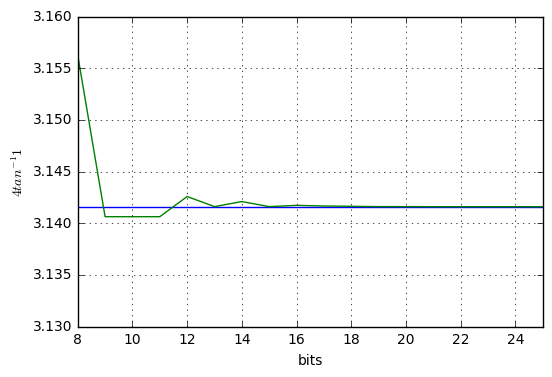

In [45]:
plotDemo()

In [46]:
a = 0.123
b = 0.569
float(a+b)

0.692

In [34]:
fa = FixedPoint.FXnum(a,FixedPoint.FXfamily(n_bits=4, n_intbits=2))
fb = FixedPoint.FXnum(b,FixedPoint.FXfamily(n_bits=4, n_intbits=2))
fa+fb

FXnum(family=FXfamily(n_bits=4, n_intbits=2), scaled_value=10)

In [35]:
float(fa+fb)

0.625